In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.set_cmap("viridis")
font = {'size'   : 15}

matplotlib.rc('font', **font)
markersize = 15

<Figure size 640x480 with 0 Axes>

In [3]:
algorithms = ['CDS-Simple-Lam', 'CDS-GK96', 'CDS-WAF02', 'CDS-Lam-Congest']
result_dir = "results_cds"
n_tests = 50

In [4]:
failed = {algorithm : [] for algorithm in algorithms}

In [5]:
list_n = list(range(200, 2001, 200))

In [6]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_finished_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_selected_nodes = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_worst_case_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            n_success = 0
            for i in range(n_tests):
                result_file = f"{result_dir}/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                if not os.path.isfile(result_file):
                    print(f"Algorithm {algorithm} failed at input {result_file}!")
                    failed[algorithm].append(result_file)
                    continue
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                        failed[algorithm].append(result_file)
                        continue
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     max_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    all_n_finished_rounds[algorithm][n] += finished_round
                    
                    if algorithm == "CDS-Lam-Congest":
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                    
                    all_n_selected_nodes[algorithm][n] += n_selected_nodes
                    all_n_worst_case_awake_rounds[algorithm][n] += max_awake_rounds
                    n_success += 1
                        
            all_n_active_rounds[algorithm][n] /= n_success
            all_n_finished_rounds[algorithm][n] /= n_success
            all_n_average_awake_rounds[algorithm][n] /= n_success
            all_n_selected_nodes[algorithm][n] /= n_success
            all_n_worst_case_awake_rounds[algorithm][n] /= n_success
            
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_finished_rounds[algorithm][n] = np.round(all_n_finished_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)
            all_n_selected_nodes[algorithm][n] = np.round(all_n_selected_nodes[algorithm][n], 2)
            all_n_worst_case_awake_rounds[algorithm][n] = np.round(all_n_worst_case_awake_rounds[algorithm][n], 2)

Algorithm CDS-Lam-Congest failed at input results_cds/2000/sparse/CDS-Lam-Congest_048.txt!


In [7]:
pprint(all_n_active_rounds)

{'CDS-GK96': {200: 115.76,
              400: 155.36,
              600: 196.72,
              800: 233.7,
              1000: 270.06,
              1200: 297.78,
              1400: 326.38,
              1600: 324.6,
              1800: 355.34,
              2000: 372.1},
 'CDS-Lam-Congest': {200: 582.2,
                     400: 901.0,
                     600: 1220.12,
                     800: 1513.26,
                     1000: 1781.84,
                     1200: 2100.14,
                     1400: 2213.16,
                     1600: 2405.3,
                     1800: 2861.42,
                     2000: 2962.71},
 'CDS-Simple-Lam': {200: 24.94,
                    400: 27.26,
                    600: 29.1,
                    800: 29.08,
                    1000: 30.88,
                    1200: 31.62,
                    1400: 32.22,
                    1600: 32.38,
                    1800: 32.42,
                    2000: 33.92},
 'CDS-WAF02': {200: 76.24,
               400: 9

In [8]:
pprint(all_n_average_awake_rounds)

{'CDS-GK96': {200: 115.76,
              400: 155.36,
              600: 196.72,
              800: 233.7,
              1000: 270.06,
              1200: 297.78,
              1400: 326.38,
              1600: 324.6,
              1800: 355.34,
              2000: 372.1},
 'CDS-Lam-Congest': {200: 55.76,
                     400: 62.3,
                     600: 67.48,
                     800: 73.68,
                     1000: 76.0,
                     1200: 78.1,
                     1400: 78.59,
                     1600: 80.86,
                     1800: 86.14,
                     2000: 87.53},
 'CDS-Simple-Lam': {200: 24.94,
                    400: 27.26,
                    600: 29.1,
                    800: 29.08,
                    1000: 30.88,
                    1200: 31.62,
                    1400: 32.22,
                    1600: 32.38,
                    1800: 32.42,
                    2000: 33.92},
 'CDS-WAF02': {200: 76.24,
               400: 98.7,
             

In [9]:
pprint(all_n_worst_case_awake_rounds)

{'CDS-GK96': {200: 115.38,
              400: 155.08,
              600: 196.56,
              800: 233.46,
              1000: 269.74,
              1200: 297.54,
              1400: 326.04,
              1600: 324.38,
              1800: 354.92,
              2000: 371.8},
 'CDS-Lam-Congest': {200: 161.46,
                     400: 194.9,
                     600: 212.84,
                     800: 243.02,
                     1000: 252.18,
                     1200: 266.02,
                     1400: 277.32,
                     1600: 288.7,
                     1800: 311.5,
                     2000: 311.65},
 'CDS-Simple-Lam': {200: 21.34,
                    400: 22.64,
                    600: 23.88,
                    800: 23.94,
                    1000: 25.38,
                    1200: 26.14,
                    1400: 26.6,
                    1600: 26.4,
                    1800: 26.56,
                    2000: 27.92},
 'CDS-WAF02': {200: 76.24,
               400: 98.7,
  

In [10]:
pprint(all_n_selected_nodes)

{'CDS-GK96': {200: 71.1,
              400: 136.66,
              600: 201.66,
              800: 268.42,
              1000: 331.82,
              1200: 392.54,
              1400: 444.72,
              1600: 493.0,
              1800: 565.08,
              2000: 640.18},
 'CDS-Lam-Congest': {200: 71.74,
                     400: 137.18,
                     600: 202.16,
                     800: 269.06,
                     1000: 332.46,
                     1200: 393.16,
                     1400: 445.38,
                     1600: 493.78,
                     1800: 565.58,
                     2000: 638.92},
 'CDS-Simple-Lam': {200: 114.9,
                    400: 238.6,
                    600: 356.66,
                    800: 480.14,
                    1000: 601.6,
                    1200: 720.78,
                    1400: 834.76,
                    1600: 940.2,
                    1800: 1072.48,
                    2000: 1201.94},
 'CDS-WAF02': {200: 67.2,
               400:

In [11]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/cds_average_awake.csv")
df_average_awake

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
200,24.94,115.76,76.24,55.76
400,27.26,155.36,98.70,62.30
600,29.10,196.72,119.72,67.48
800,29.08,233.70,137.72,73.68
1000,30.88,270.06,153.92,76.00
1200,31.62,297.78,164.78,78.10
1400,32.22,326.38,170.80,78.59
1600,32.38,324.60,186.96,80.86
1800,32.42,355.34,197.30,86.14
2000,33.92,372.10,209.78,87.53


In [12]:
df_worst_case_awake = pd.DataFrame(all_n_worst_case_awake_rounds)
df_worst_case_awake.to_csv("stat/cds_worst_case_awake.csv")
df_worst_case_awake

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
200,21.34,115.38,76.24,161.46
400,22.64,155.08,98.70,194.90
600,23.88,196.56,119.72,212.84
800,23.94,233.46,137.72,243.02
1000,25.38,269.74,153.92,252.18
1200,26.14,297.54,164.78,266.02
1400,26.60,326.04,170.80,277.32
1600,26.40,324.38,186.96,288.70
1800,26.56,354.92,197.30,311.50
2000,27.92,371.80,209.78,311.65


In [13]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/cds_active_rounds.csv")
df_active_rounds

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
200,24.94,115.76,76.24,582.20
400,27.26,155.36,98.70,901.00
600,29.10,196.72,119.72,1220.12
800,29.08,233.70,137.72,1513.26
1000,30.88,270.06,153.92,1781.84
1200,31.62,297.78,164.78,2100.14
1400,32.22,326.38,170.80,2213.16
1600,32.38,324.60,186.96,2405.30
1800,32.42,355.34,197.30,2861.42
2000,33.92,372.10,209.78,2962.71


In [14]:
df_finished_rounds = pd.DataFrame(all_n_finished_rounds)
df_finished_rounds.to_csv("stat/cds_finished_rounds.csv")
df_finished_rounds

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
200,50.98,124.96,76.24,8429.06
400,51.00,162.94,98.70,10007.88
600,51.00,202.78,119.72,10913.96
800,51.00,239.52,137.72,12224.54
1000,51.00,275.34,153.92,12580.50
1200,51.00,303.46,164.78,12952.64
1400,51.00,332.18,170.80,13357.14
1600,51.00,329.90,186.96,14166.14
1800,51.00,360.04,197.30,15088.40
2000,51.00,377.02,209.78,15246.90


In [15]:
df_cds_size = pd.DataFrame(all_n_selected_nodes)
df_cds_size.to_csv("stat/cds_size.csv")
df_cds_size

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
200,114.90,71.10,67.20,71.74
400,238.60,136.66,131.70,137.18
600,356.66,201.66,199.08,202.16
800,480.14,268.42,264.68,269.06
1000,601.60,331.82,329.20,332.46
1200,720.78,392.54,388.62,393.16
1400,834.76,444.72,444.74,445.38
1600,940.20,493.00,491.96,493.78
1800,1072.48,565.08,566.04,565.58
2000,1201.94,640.18,640.40,638.92


In [16]:
def plot_df(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values
    ax.plot(r, df["CDS-Simple-Lam"].values, marker='v', markersize=markersize, label="CDS-Simple")
    ax.plot(r, df["CDS-GK96"].values, marker='D', markersize=markersize, label="CDS-GK96")
    ax.plot(r, df["CDS-WAF02"].values, marker='o', markersize=markersize, label="CDS-WAF02")
    ax.plot(r, df["CDS-Lam-Congest"].values, marker='x', markersize=markersize, label="SMCDS")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

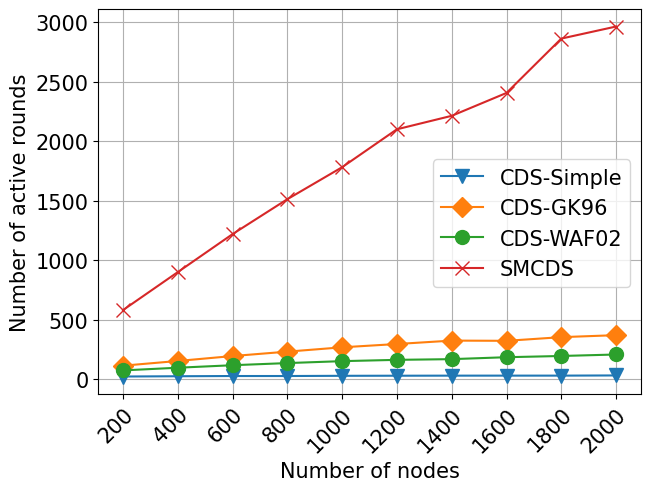

In [17]:
plot_df(df_active_rounds, figsize=(7,5), bbox_to_anchor=(0.5, 0, 0.4, 0.6), y_ticks=np.arange(0, 3500, 500),
        y_label="Number of active rounds")
plt.savefig("stat/cds_active_rounds.pdf", bbox_inches="tight")

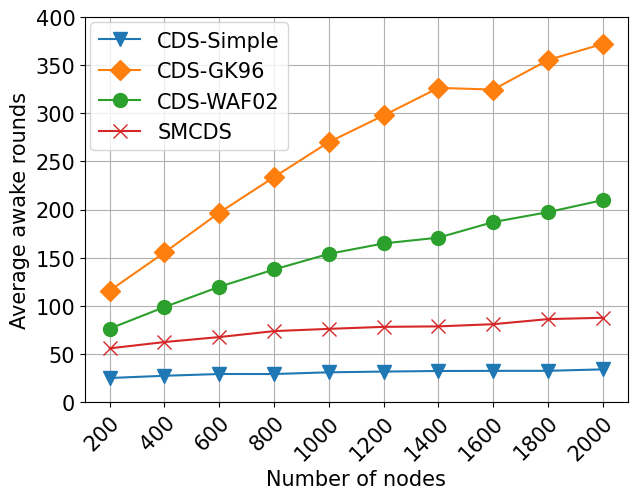

In [18]:
plot_df(df_average_awake, figsize=(7,5), bbox_to_anchor=(0, 0, 0.43, 0.89), y_ticks=np.arange(0, 450, 50),
        y_label="Average awake rounds")
plt.savefig("stat/cds_average_awake.pdf", bbox_inches="tight")

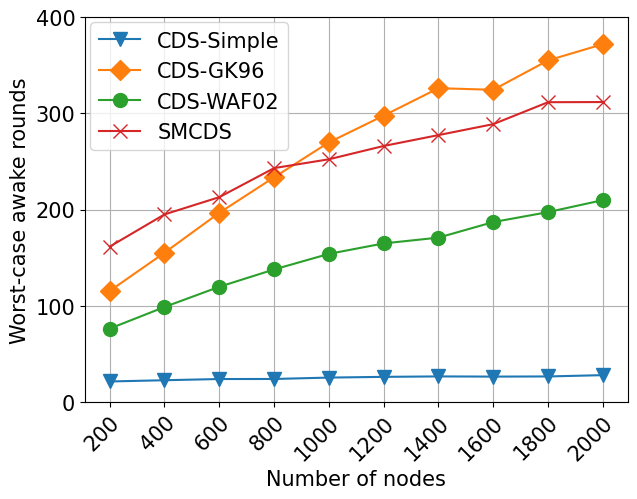

In [19]:
plot_df(df_worst_case_awake, figsize=(7,5), bbox_to_anchor=(0, 0, 0.43, 0.89), y_ticks=np.arange(0, 450, 100),
        y_label="Worst-case awake rounds")
plt.savefig("stat/cds_worst_case_awake.pdf", bbox_inches="tight")

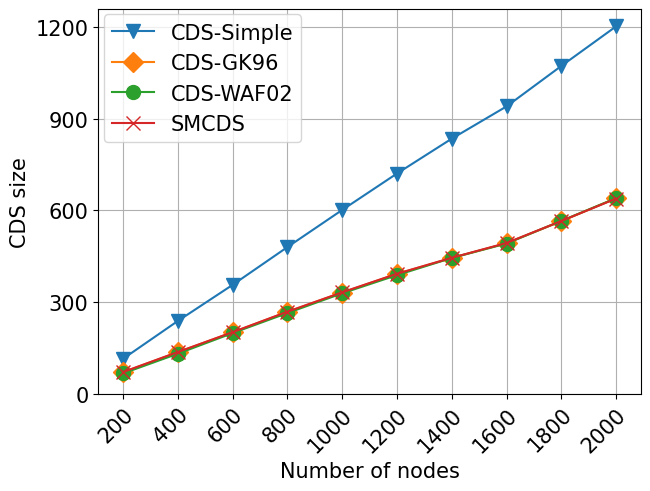

In [20]:
plot_df(df_cds_size, figsize=(7,5), bbox_to_anchor=(0, 0, 0.43, 0.89), y_ticks=np.arange(0, 1500, 300),
        y_label="CDS size")
plt.savefig("stat/cds_size.pdf", bbox_inches="tight")